# Machine learning

In [1]:
import os  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\amitx\\Desktop\\עמית קבצים\\לימודים\\שנה ב\\מדעי הנתנוים\\פרויקט\\פרויקט מתוקן\\Data clean.csv")
df = df.drop("Unnamed: 0",axis=1)
df = df.drop("index",axis=1)
df

,price,color,likes,brand,Percentage discount,Rate,Fit,in sale,category,sex,color_encoded,brand_encoded,fabric types,Fit_encoded,category_encoded,sex_encoded,fabric types_encoded
0,158.60,brown,910.0,nike,45,0.0,oversized fit,1,hoodies & sweatshirts,women,3,16,fleece,12,1,1,4
1,196.80,black,216.0,under armour,29,0.0,regular fit,1,hoodies & sweatshirts,women,1,25,fabric,14,1,1,13
2,238.79,white,669.0,nike,29,0.0,relaxed fit,1,hoodies & sweatshirts,women,17,16,fabric,17,1,1,13
3,272.90,stone,887.0,nike,19,0.0,relaxed fit,1,hoodies & sweatshirts,women,16,16,fabric,17,1,1,13
4,314.89,black,640.0,nike,24,0.0,regular fit,1,hoodies & sweatshirts,women,1,16,fabric,14,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,225.00,black,118.0,napapijri,0,0.0,regular fit,0,t-shirts & vests,men,1,14,fabric,14,4,0,13
3507,140.00,black,181.0,asos design,0,0.0,oversized fit,0,t-shirts & vests,men,1,5,fabric,12,4,0,13
3508,225.00,black,125.0,napapijri,0,0.0,regular fit,0,t-shirts & vests,men,1,14,fabric,14,4,0,13
3509,145.00,white,216.0,topman,0,0.0,oversized fit,0,t-shirts & vests,men,17,23,fabric,12,4,0,13


The following cell we drop the columns that have data that has a string. This gets our data ready for the machine learning. 

In [3]:
df = df.loc[:, df.columns != "color"]
df = df.loc[:, df.columns != "brand"]
df = df.loc[:, df.columns != "Fit"]
df = df.loc[:, df.columns != "category"]
df = df.loc[:, df.columns != "sex"]
df = df.loc[:, df.columns != "fabric types"]


In the following cell, we convert the columns price to a whole number in order to use the models on our table. 

In [4]:
df['price'] = df['price'].apply(np.int64)


In [5]:
df.reset_index(drop=True)

,price,likes,Percentage discount,Rate,in sale,color_encoded,brand_encoded,Fit_encoded,category_encoded,sex_encoded,fabric types_encoded
0,158,910.0,45,0.0,1,3,16,12,1,1,4
1,196,216.0,29,0.0,1,1,25,14,1,1,13
2,238,669.0,29,0.0,1,17,16,17,1,1,13
3,272,887.0,19,0.0,1,16,16,17,1,1,13
4,314,640.0,24,0.0,1,1,16,14,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...
3506,225,118.0,0,0.0,0,1,14,14,4,0,13
3507,140,181.0,0,0.0,0,1,5,12,4,0,13
3508,225,125.0,0,0.0,0,1,14,14,4,0,13
3509,145,216.0,0,0.0,0,17,23,12,4,0,13


The following function devides the table to a values table and a target vector. 

In [6]:
def split_to_train_and_test(dataset, label_column, test_ratio, rand_state):

    X = dataset.loc[:, dataset.columns != label_column]

    y = dataset.loc[:, label_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_to_train_and_test(df, "price", 0.2, 42)

The following function finds the parameter 'k' that returns the max value in the rance of 20 options for the KNN model that is detailed later. 

In [7]:
def find_best_k_for_KNN(X_train, y_train):
    param_grid = {'n_neighbors': list(range(1, 21))}
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_neighbors'], grid_search.best_score_

In [8]:
best_K, best_f1_KNN_params = find_best_k_for_KNN(X_train, y_train)
best_K, best_f1_KNN_params

(15, 0.05409615937120702)

The following function finds the absolute values for the model decision tree.

In [9]:
def find_best_params(X_train, y_train):
    param_grid = {'max_depth': list(range(1, 11)), 'min_samples_leaf': [1, 5, 10, 20, 50]}
    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['max_depth'], grid_search.best_params_['min_samples_leaf'], grid_search.best_score_ 

best_max_dep, best_min_smpl_splt, best_f1_DT_params = find_best_params(X_train, y_train)
best_max_dep, best_min_smpl_splt, best_f1_DT_params


(10, 20, 0.5274603245054805)

The following function returns a classifier that matches the input that it receives. 

In [10]:
def get_classifier_obj(classifier_name, params):

    if(classifier_name == 'KNN'):
        clf=KNeighborsClassifier(n_neighbors=params['n_neighbors'])
    if(classifier_name == 'decision_tree'):
        clf=tree.DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    if(classifier_name == 'svm'):
        clf=svm.SVC()
    if(classifier_name == 'naive_bayes'):
        clf=GaussianNB()
    if(classifier_name == 'LogisticRegression'):    
        clf=linear_model.LogisticRegression()
    return clf

This function receives the real prediction vector and the the post machine learning prediction vector and checks the results of the model of machine learning. 

In [11]:
def calc_evaluation_val(eval_metric, y_true, y_predicted):
    if eval_metric == 'accuracy':
        evaluation_val = metrics.accuracy_score(y_true=y_true, y_pred=y_predicted)
    elif eval_metric == 'precision':
        evaluation_val = metrics.precision_score(y_true=y_true, y_pred=y_predicted, average='macro', zero_division=1)
    elif eval_metric == 'recall':
        evaluation_val = metrics.recall_score(y_true=y_true, y_pred=y_predicted, average='macro', zero_division=1)
    elif eval_metric == 'f1':
        evaluation_val = metrics.f1_score(y_true=y_true, y_pred=y_predicted, average='macro')
    elif eval_metric == 'confusion_matrix':
        if len(np.unique(y_true)) == 1:
            labels = [0] if y_true[0] == 0 else [1]
        else:
            labels = [0, 1]
        evaluation_val = metrics.confusion_matrix(y_true=y_true, y_pred=y_predicted, labels=labels)
        df_confusion = pd.DataFrame(evaluation_val, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
        print("confusion matrix:\n")
        display(df_confusion)
#         return evaluation_val
    return evaluation_val

In this function we show the results of all the models in a graph. 

In [12]:
def plot_res(evaluation,train_scores,test_scores,alg):
    
    font = {'size': 25}
    plt.rc('font', **font)

    x = np.arange(len(evaluation))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(30,15))
    rects1 = ax.bar(x - width/2, train_scores, width, label='Train',color= "#228B22")
    rects2 = ax.bar(x + width/2, test_scores, width, label='Test',color= "#0000FF")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores',fontsize=50)
    ax.set_title(f"{alg}\n",fontsize=50)
    ax.set_xticks(x)
    ax.set_xticklabels(evaluation,fontsize=30)
    ax.legend(fontsize=30,loc="lower left")


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

 The following cell initializes the parameters of KNN and of the decision tree. 

In [13]:
params_knn = {'n_neighbors': best_K}
params_decision_tree = {'max_depth': best_max_dep, 'min_samples_split': best_min_smpl_splt}

This cell initializes parameters of clasicications for each model by calling the above function. 

In [14]:
clf_naive_bayes = get_classifier_obj("naive_bayes",None)
clf_svm = get_classifier_obj("svm",None)
clf_knn = get_classifier_obj("KNN",params_knn)   
clf_decision_tree = get_classifier_obj("decision_tree",params_decision_tree)
clf_logistic_regression = get_classifier_obj("LogisticRegression",None)

The following cell trans all models 

In [15]:
clf_logistic_regression.fit(X_train,y_train)
clf_svm.fit(X_train,y_train)
clf_knn.fit(X_train,y_train)
clf_naive_bayes.fit(X_train,y_train)
clf_decision_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=10, min_samples_split=20)

The following cell initializes by variables the values that were predicted.

In [16]:
train_logistic_regression = clf_logistic_regression.predict(X_train)
train_svm = clf_svm.predict(X_train)
train_knn = clf_knn.predict(X_train)
train_naive_bayes = clf_naive_bayes.predict(X_train)
train_decision_tree = clf_decision_tree.predict(X_train)

The following cell intializes variables and values that were predicted after the trainning. 

In [17]:
predicted_logistic_regression = clf_logistic_regression.predict(X_test)
predicted_svm = clf_svm.predict(X_test)
predicted_knn = clf_knn.predict(X_test)
predicted_naive_bayes = clf_naive_bayes.predict(X_test)
predicted_decision_tree = clf_decision_tree.predict(X_test)

The following cell intializes one million for the values that were predicted in the training stage and the actual values that were predicted at real time. 

In [18]:
predicted_train = {"logistic_regression": train_logistic_regression,
                  "naive_bayes": train_naive_bayes,
                  "svm": train_svm,
                  "knn": train_knn,
                  "decision_tree": train_decision_tree}
predicted_test = {"logistic_regression": predicted_logistic_regression,
                  "naive_bayes": predicted_naive_bayes,
                  "svm": predicted_svm,
                  "knn": predicted_knn,
                  "decision_tree": predicted_decision_tree}
evaluation = ["accuracy","precision","recall","f1"]

This cell prints and calls the function that displays the alues of the machine learning models. 

 

the algorithm is : logistic_regression
accuracy on train data:  0.0698005698005698
accuracy on test data:   0.05405405405405406 

precision on train data:  0.934175728217611
precision on test data:   0.9152608569751163 

recall on train data:  0.011165786628560373
recall on test data:   0.0107184329560234 

f1 on train data:  0.004012966846277979
f1 on test data:   0.0035024102903718096 



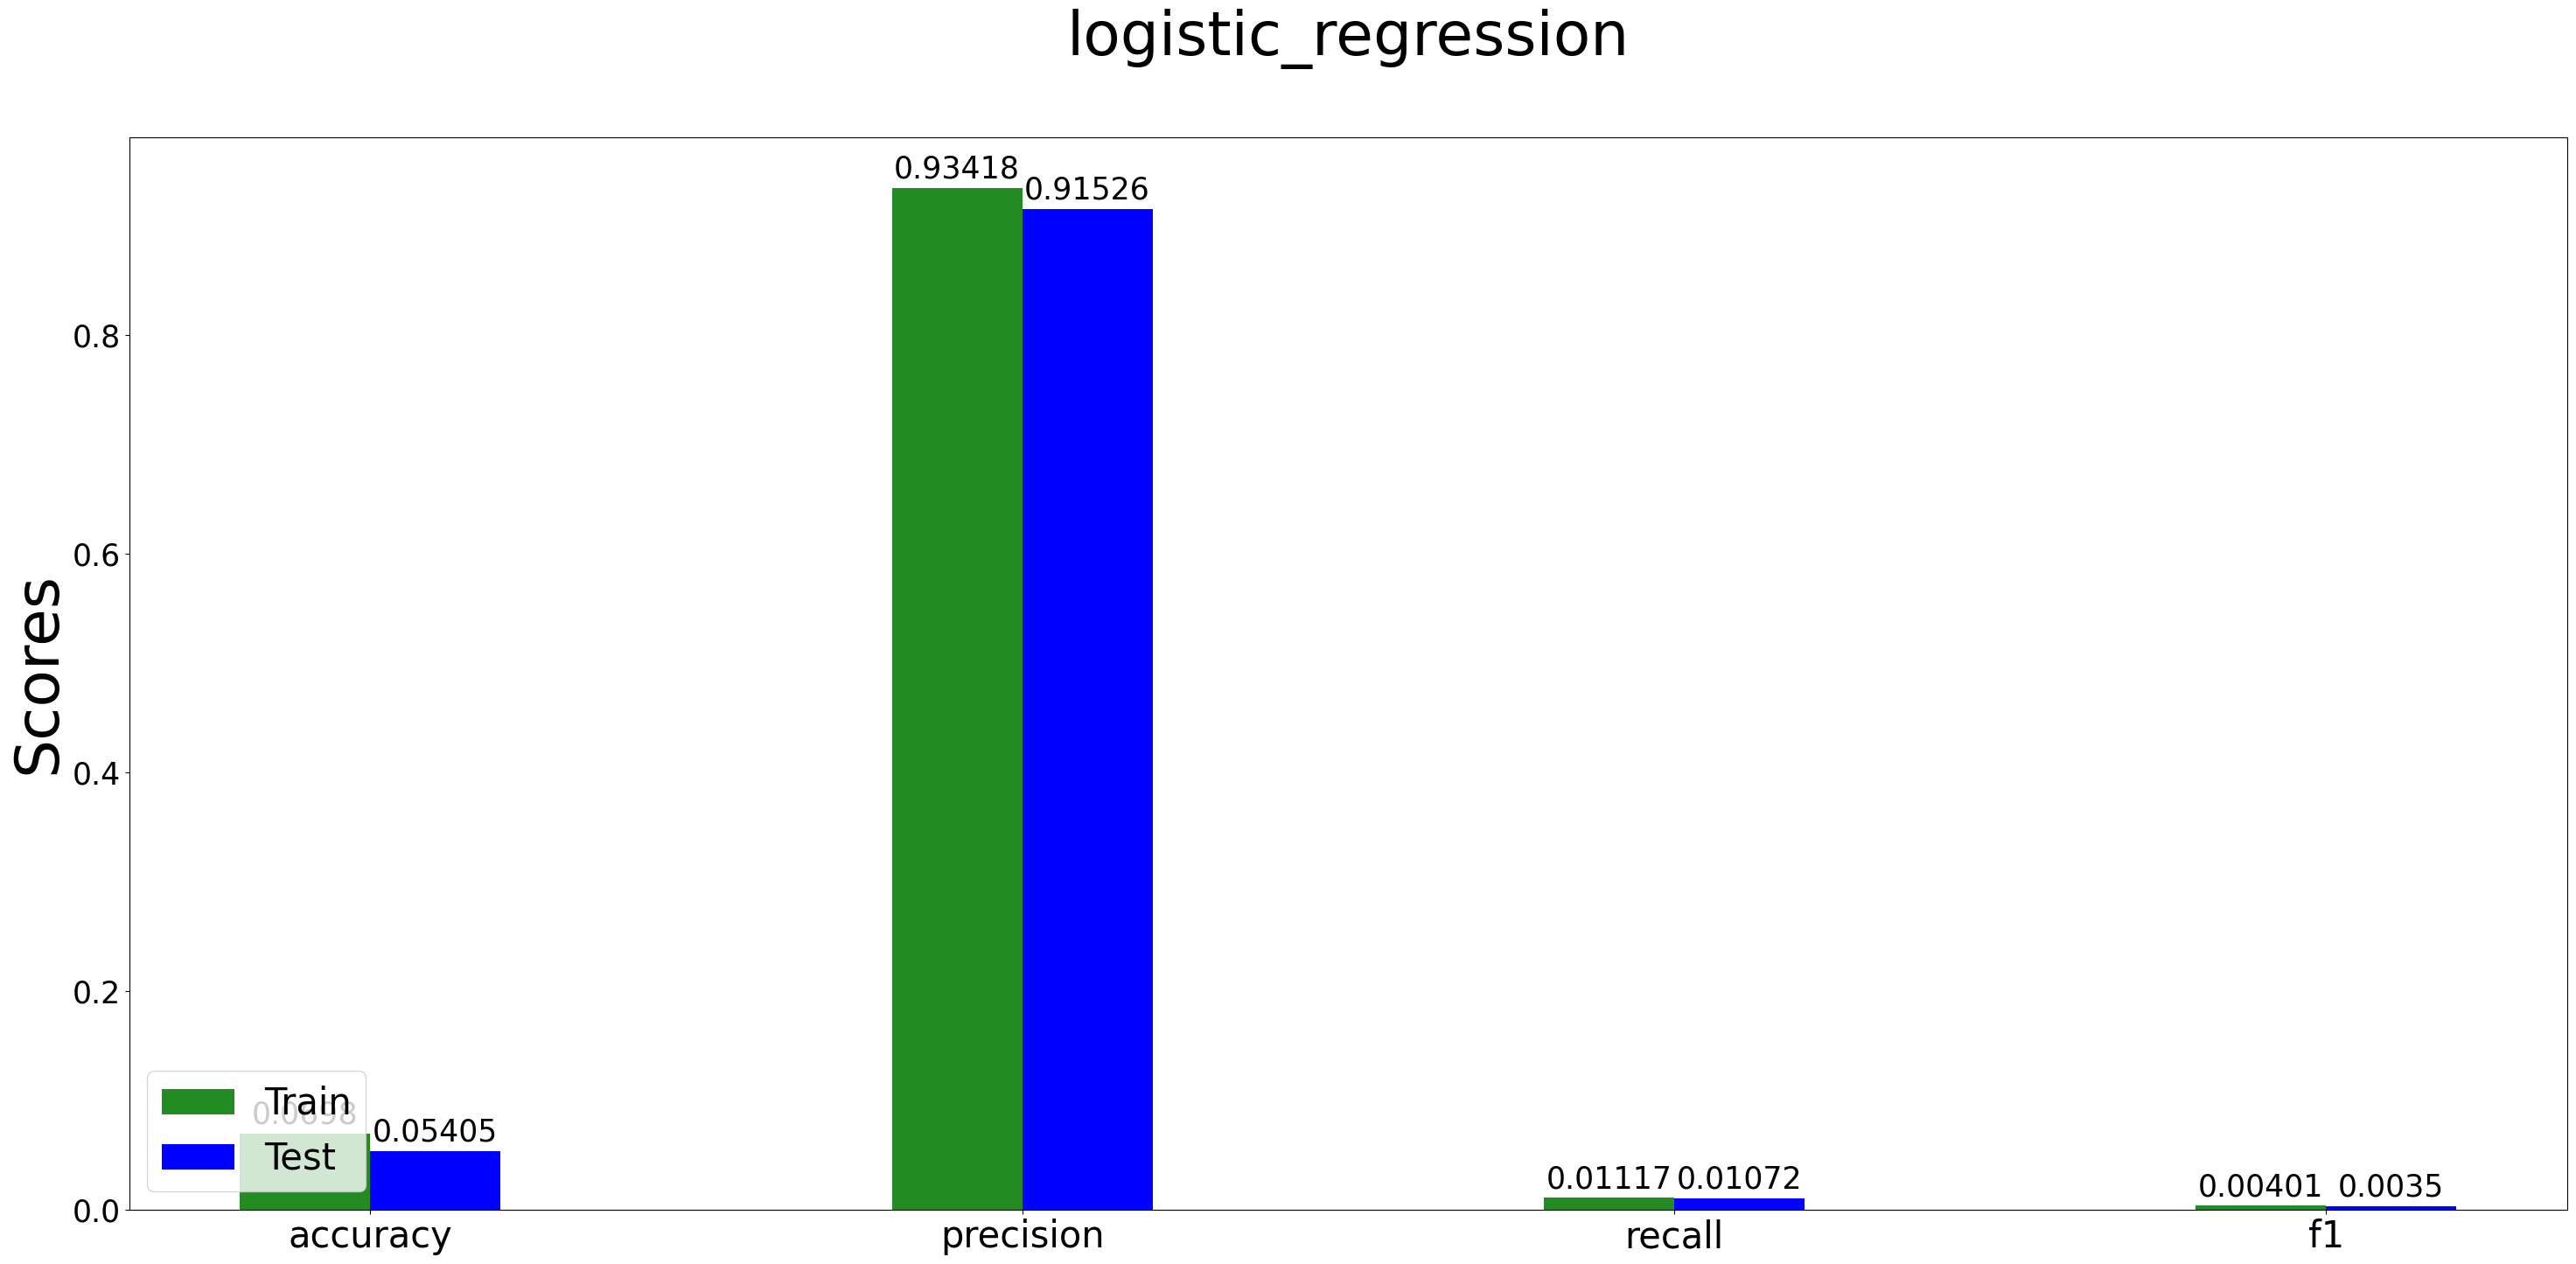

 

the algorithm is : naive_bayes
accuracy on train data:  0.09472934472934473
accuracy on test data:   0.01991465149359886 

precision on train data:  0.5922133118428107
precision on test data:   0.5006102522306226 

recall on train data:  0.43269338315823364
recall on test data:   0.17537689933523268 

f1 on train data:  0.3342285701013628
f1 on test data:   0.009830276740476325 



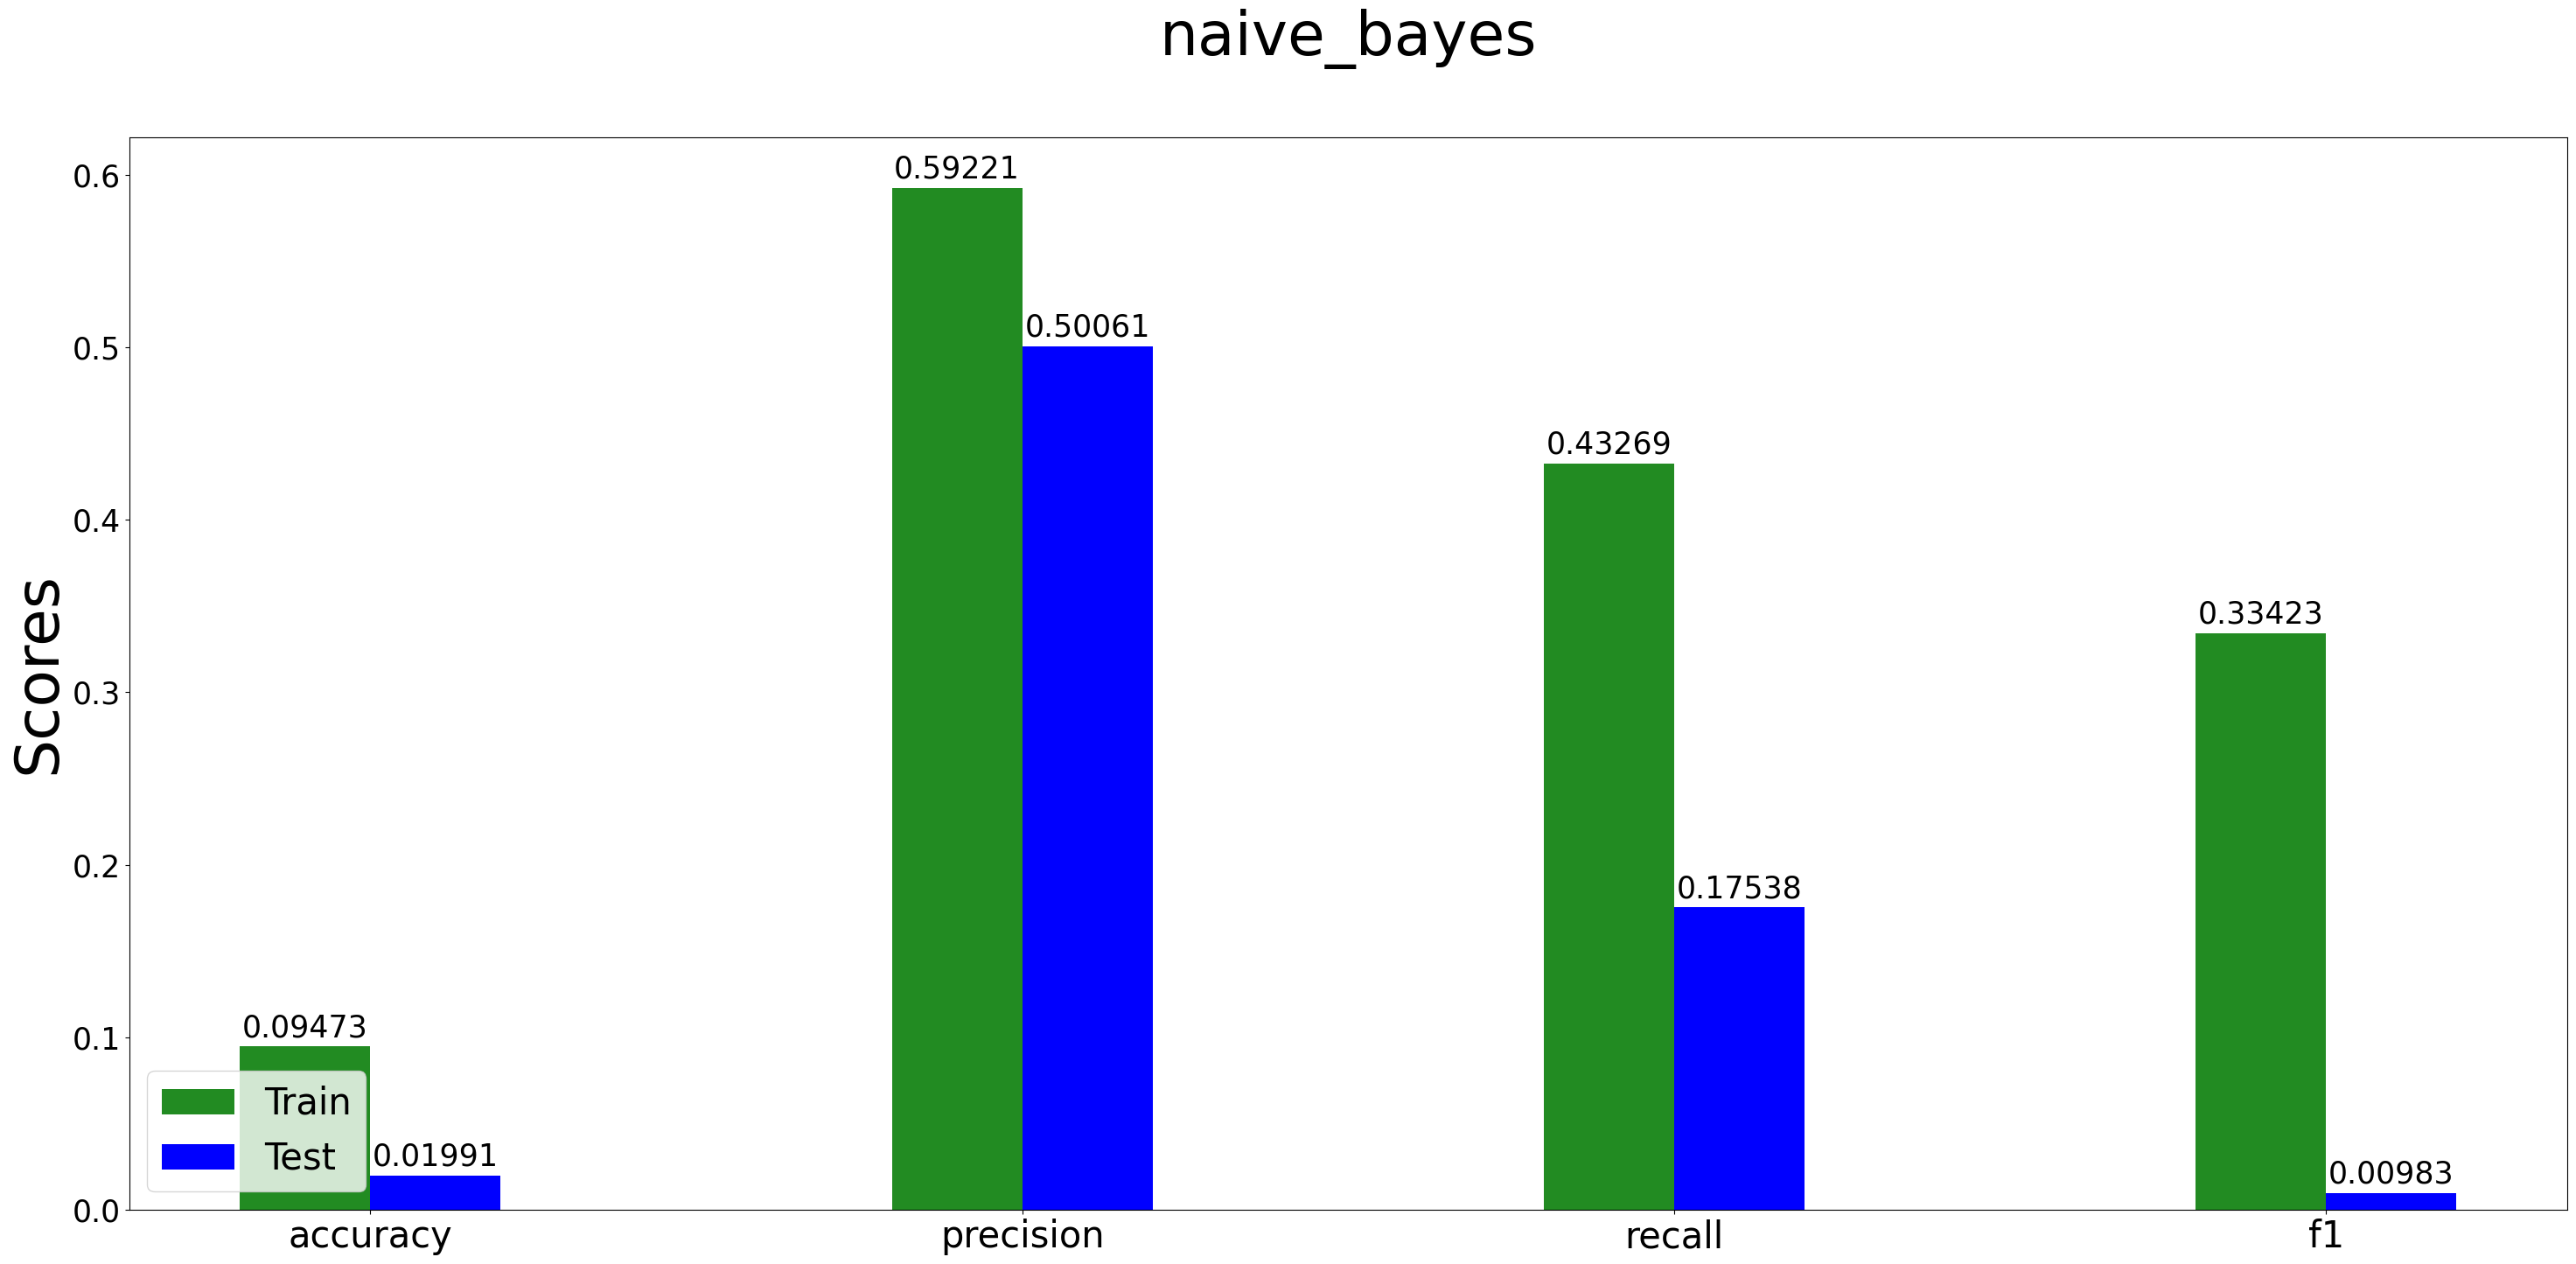

 

the algorithm is : svm
accuracy on train data:  0.05733618233618234
accuracy on test data:   0.059743954480796585 

precision on train data:  0.9850182059487685
precision on test data:   0.979067399670389 

recall on train data:  0.006822212615993434
recall on test data:   0.007819212923182677 

f1 on train data:  0.0014974361652298177
f1 on test data:   0.0014576765761402889 



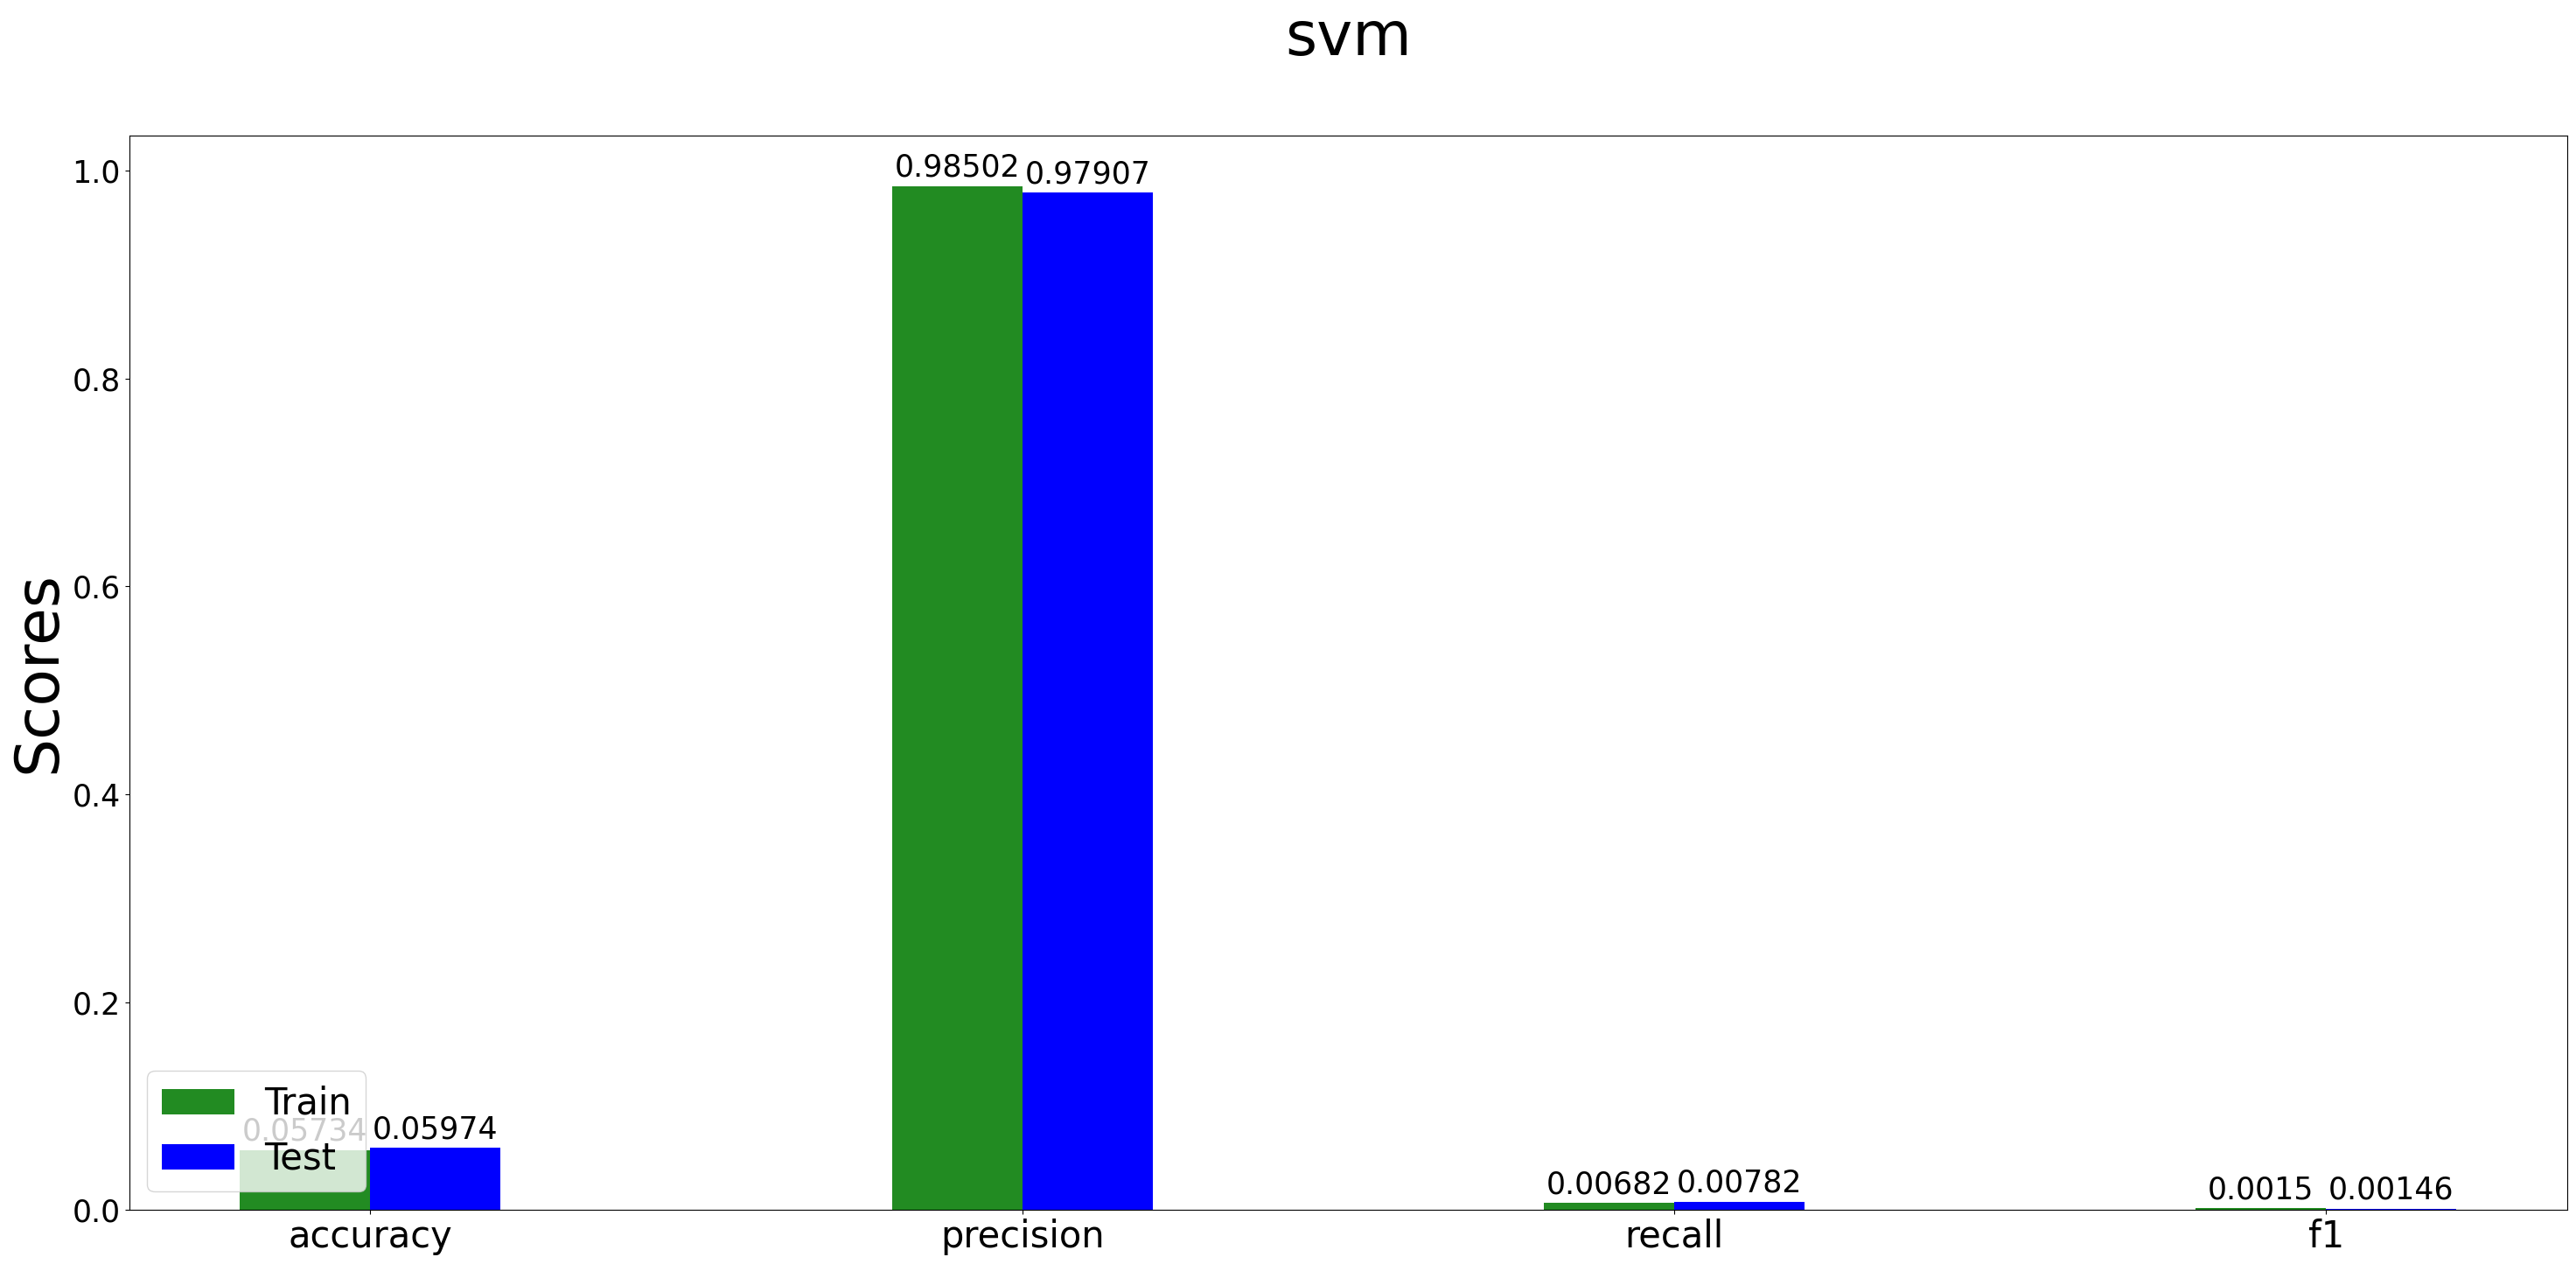

 

the algorithm is : knn
accuracy on train data:  0.16417378917378916
accuracy on test data:   0.05405405405405406 

precision on train data:  0.5263281335207209
precision on test data:   0.4986910689754544 

recall on train data:  0.09025341457104977
recall on test data:   0.07125071630403573 

f1 on train data:  0.07466427584899882
f1 on test data:   0.012556461337699087 



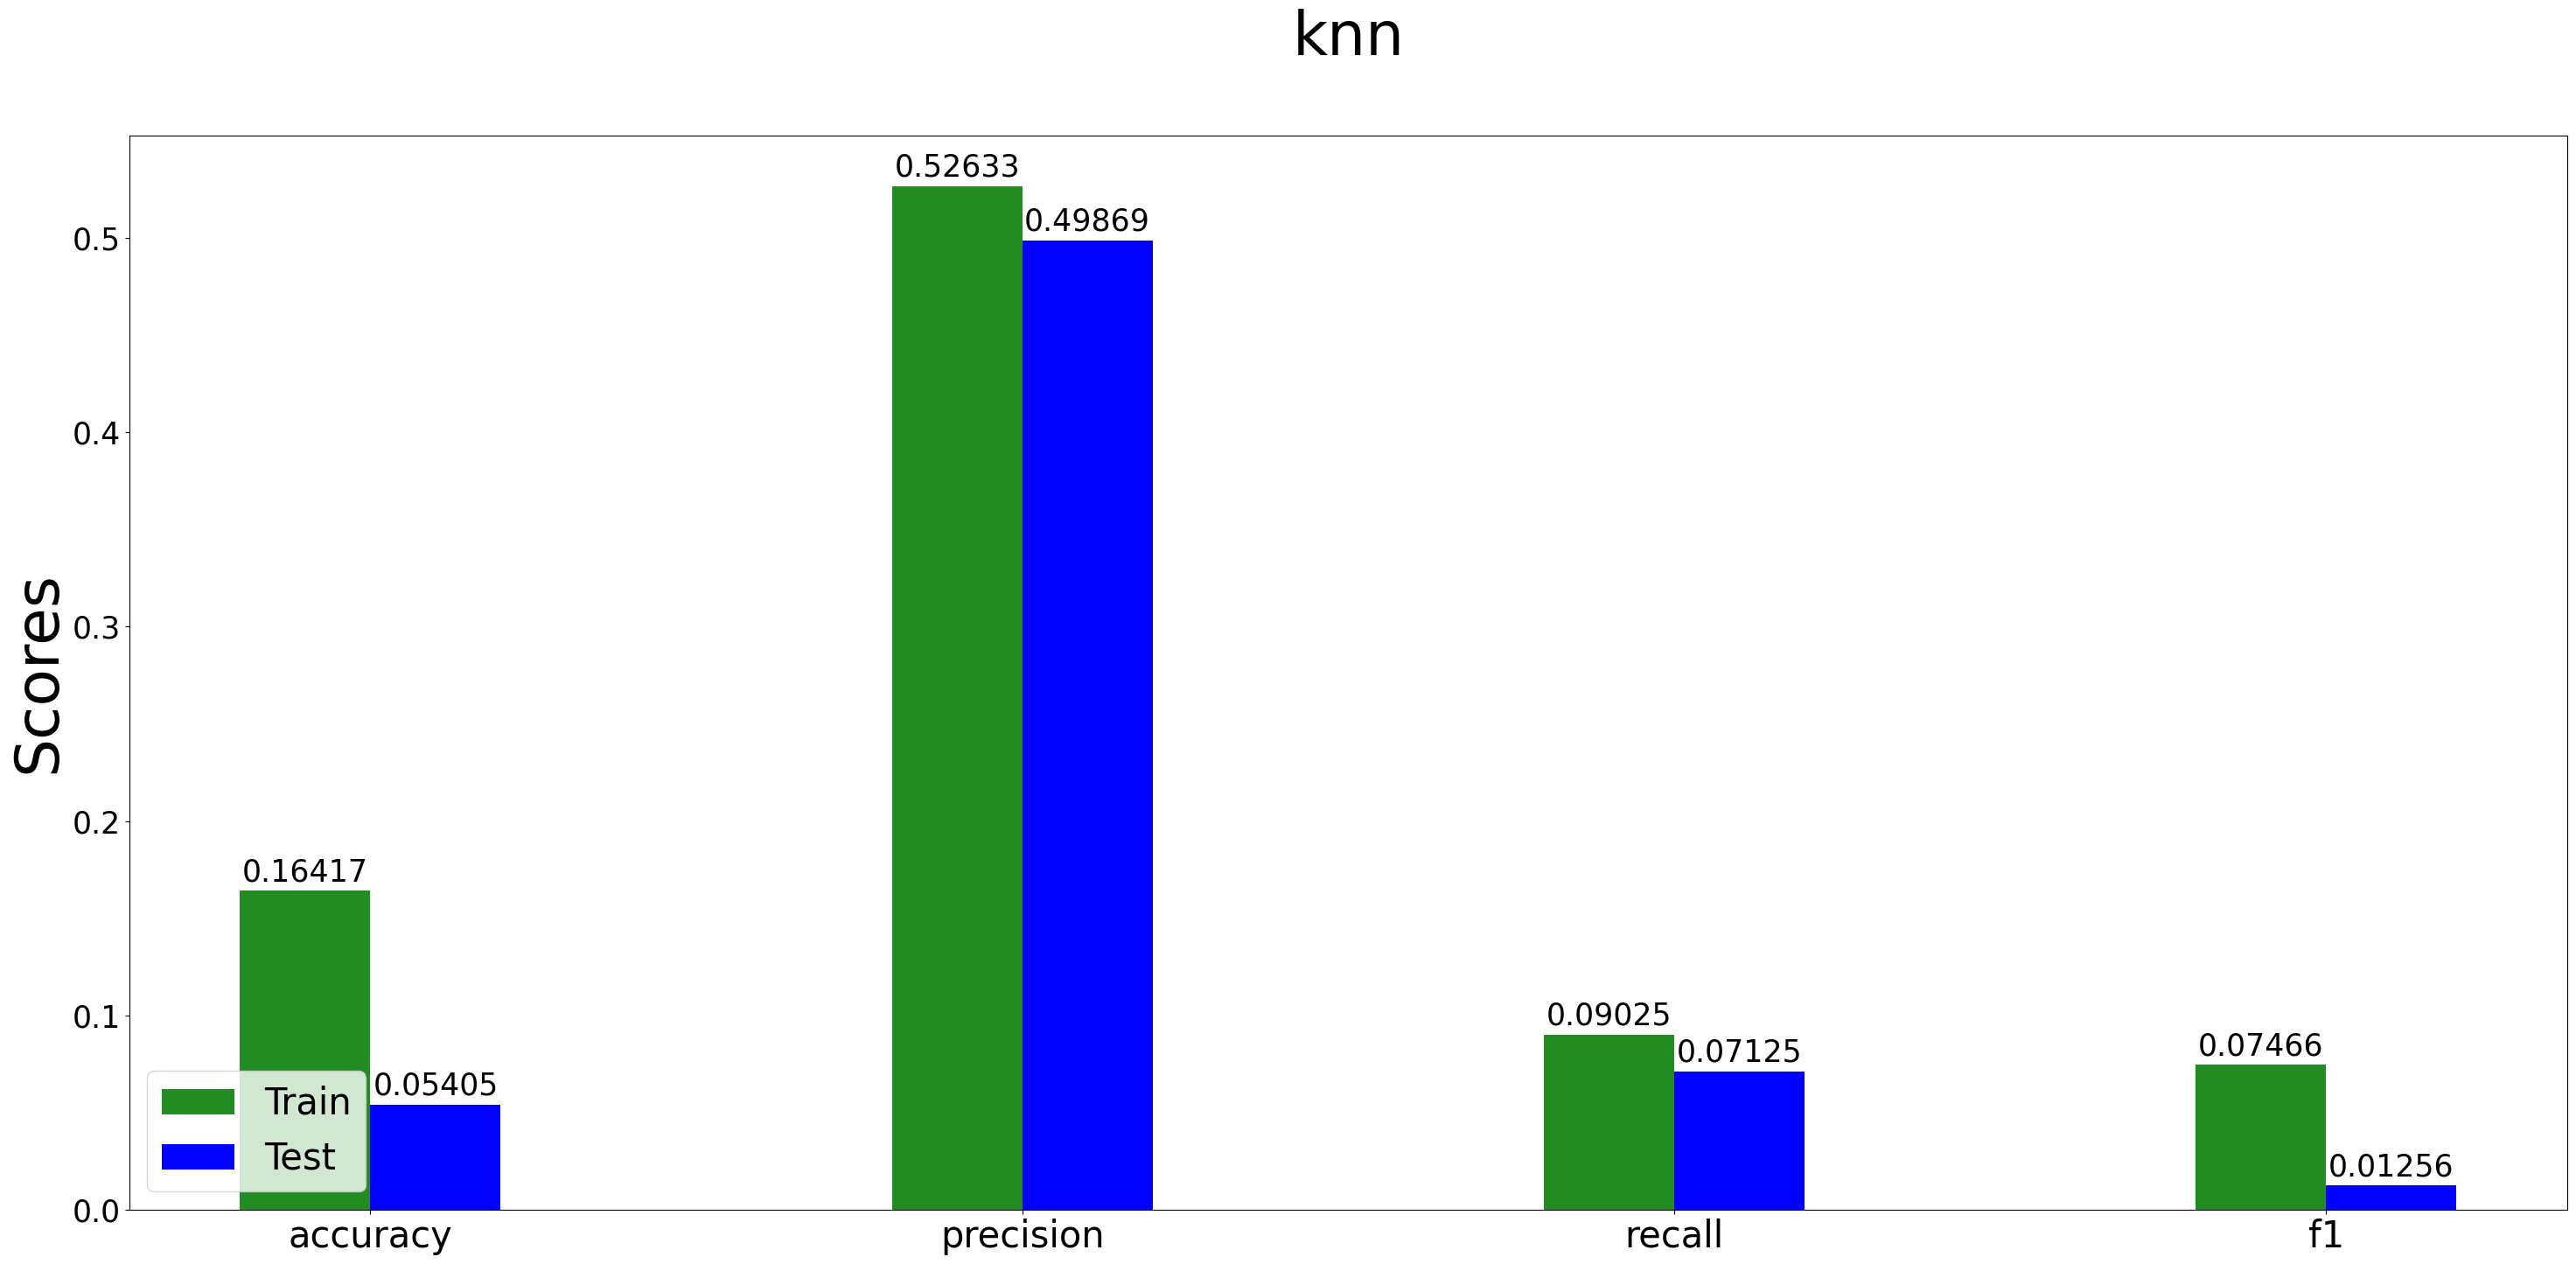

 

the algorithm is : decision_tree
accuracy on train data:  0.2795584045584046
accuracy on test data:   0.16358463726884778 

precision on train data:  0.7419298915236712
precision on test data:   0.6062402437934516 

recall on train data:  0.2060220491921965
recall on test data:   0.16428745586305082 

f1 on train data:  0.15272360521433384
f1 on test data:   0.06442389356811576 



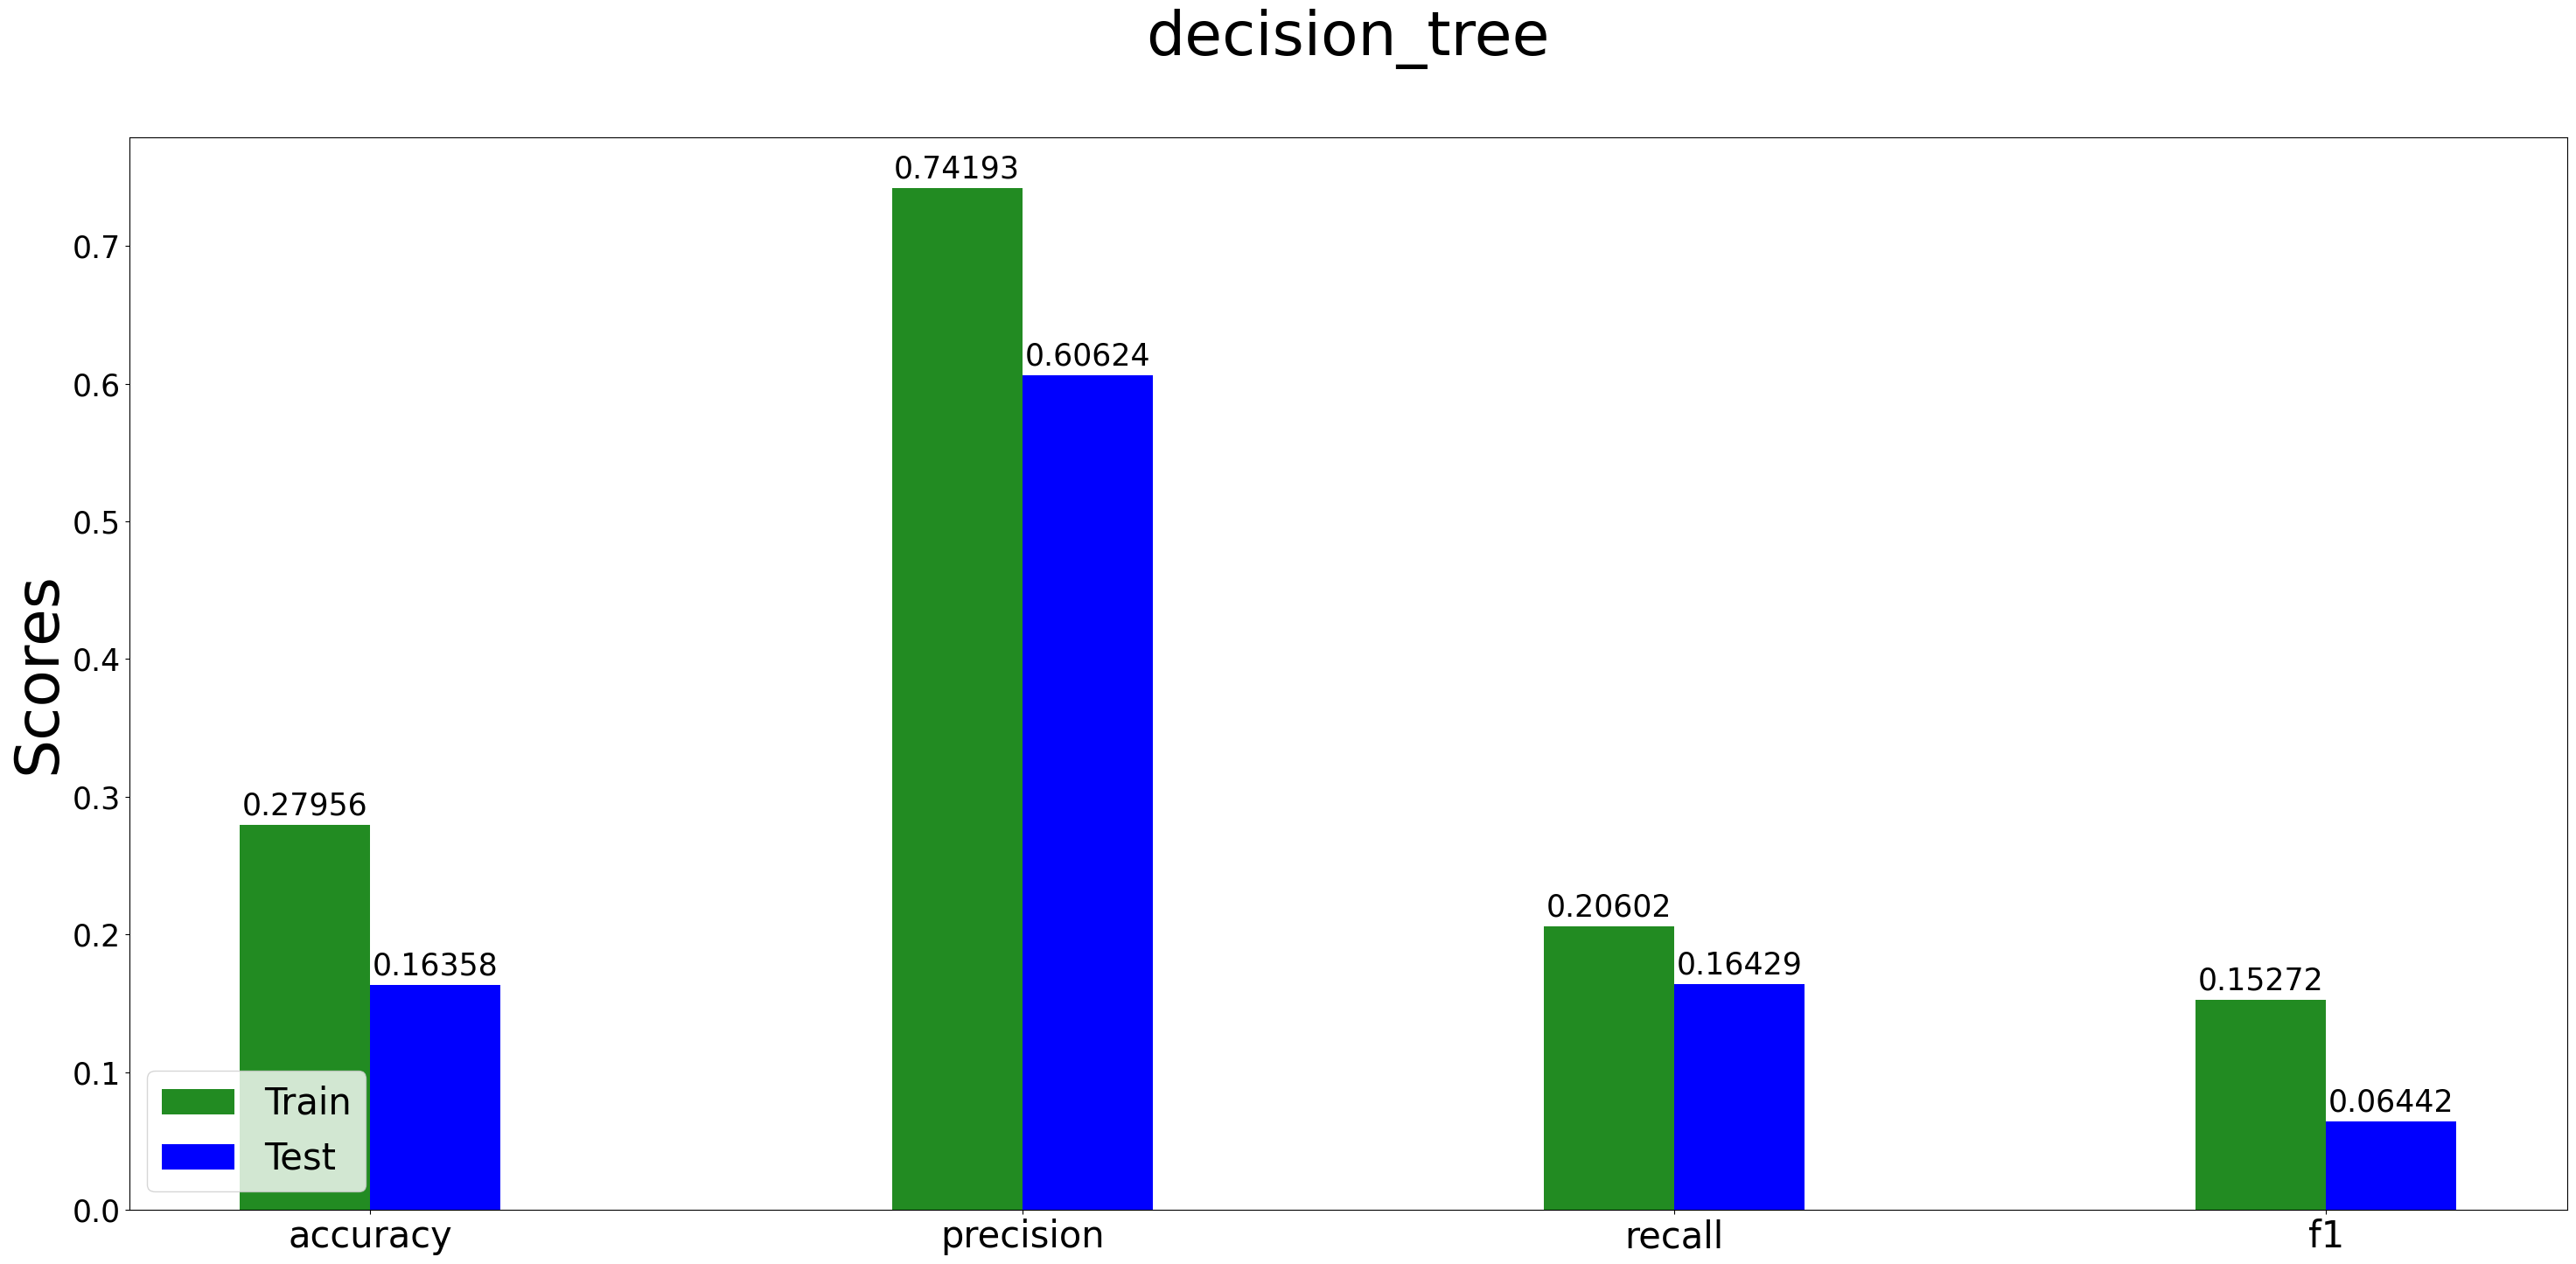

In [19]:
for alg in ["logistic_regression","naive_bayes","svm","knn","decision_tree"]:
    train_scores = []
    test_scores = []
    print(f" \n\nthe algorithm is : {alg}")
    for evaluat in evaluation:
        train_result = calc_evaluation_val(evaluat, y_train, predicted_train[alg])
        train_scores.append(round(train_result, 5))
        print(evaluat,"on train data: ",train_result)
        test_result = calc_evaluation_val(evaluat, y_test, predicted_test[alg])
        test_scores.append(round(test_result, 5))
        print(evaluat,"on test data:  ",test_result ,"\n")
    
    plot_res(evaluation,train_scores,test_scores,alg)
